# Análisis de Componetes Principales

## Primer acercamineto: PRODy

In [1]:
from prody import *
from pylab import *

/home/joel/anaconda3/envs/mds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
# Genero una lista de archivos disponibles en el directorio de los modelos completos
import glob
from pathlib import Path
main_PDBS_dir = "../ARCHIVOS/CRISTALES/PROT_CDK2_PREPARADAS/"
dir_ENS = main_PDBS_dir +  "PREP_ALL_ENSAMBLE" # Hidrógenos agregados sin pka

# Es importante cargar la lista ORDENADA!!
glob.glob("../ARCHIVOS/CRISTALES/PROT_CDK2_MODELOS_modeller_NoPrep/*")


[]

In [15]:
pdbs_full

[]

In [5]:
# Obtengo el conjunto de estructuras pdb de CDK2, en praticular sólo los CA
pdbs = parsePDB( *[ pdb for pdb in pdbs_full ], subset='ca' )

# Número de estructuras cargadas
len(pdbs)

@> 385 PDBs were parsed in 4.19s.                                 


385

### Estructura de referencia

Se toma como estructura de referencia al cristal 1fin, el cual tiene un 100% de covertura con la secuencia de la cdk2.

In [6]:
ref_id = '1fin'
ref_structure = parsePDB(pdbs_model_dir + ref_id + "_full.pdb", subset = "ca")

@> 298 atoms and 1 coordinate set(s) were parsed in 0.00s.


#### Residuos definidos por Pisiani (2015) para su análisis

Para hacer el ensamble y alinear las estructuras en una *"trayectoria"* se definen los residuos que se tomaran en cuenta para el alineamiento:  
**PISIANNI**: son los residuos usados por Pisiani en su artículo prara alinear las estructuras.

In [7]:
from itertools import chain

'''This list of residues was characterized as the subset of residues that contains 
the largest part of the information about the structural variability of CDK2 
and includes residues of R-spine (except for Met 196), C-spine, DFG, and the catalytic loop.'''

pisiani_rangeResidues = [ [4,12], [17, 24], [29,34], [46,55], [66,71], [76,81],  
                         [87,93], [101, 120], [121, 135], [140, 150], [182, 194], [277, 282]]

lista = [list( range(valor[0], valor[1]) ) for valor in pisiani_rangeResidues]

# Se obtiene la lista de residuos, incluida en formato de cadena de texto
pisiani_residues = list(chain.from_iterable(lista))
pisiani_residues_str = ' '.join(str(e) for e in pisiani_residues)

print(pisiani_residues_str)

4 5 6 7 8 9 10 11 17 18 19 20 21 22 23 29 30 31 32 33 46 47 48 49 50 51 52 53 54 66 67 68 69 70 76 77 78 79 80 87 88 89 90 91 92 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 140 141 142 143 144 145 146 147 148 149 182 183 184 185 186 187 188 189 190 191 192 193 277 278 279 280 281


**RICCI**: Son residuos definidos a partir de la estructura 4fkw, del dataset de CSAR. Se definen al identificar todos los residuos que están dentro de 7 A de distancia de cualquier átomo del ligando cocristalizado, ubicado en la cavidad catalítica de la CDK2.

In [8]:
# Pocket (4FKW y su ligando a 7 A): 8-19, 30-33, 64-65, 79-90, 129-134, 143-146
# resid 8 to 19 30 to 33 64 65 79 to 90 129 to 134 143 to 146
ricci_rangeResidues = [[8,19], [30,33], [64,65], [79,90], [129,134], [143,146]]

lista = [list( range(valor[0], valor[1]) ) for valor in ricci_rangeResidues]
ricci_residues = list(chain.from_iterable(lista))
ricci_residues_str = ' '.join(str(e) for e in ricci_residues)

print(ricci_residues_str)

8 9 10 11 12 13 14 15 16 17 18 30 31 32 64 79 80 81 82 83 84 85 86 87 88 89 129 130 131 132 133 143 144 145


### Creación de  un Ensamble con las 387 estructuras y CA
#### Estructuras pseudo-NMR ("Estructuras homogéneas")

In [9]:
# Selección de los aminoácidos de referencia
ref_strcRes =  ref_structure.select('resnum ' + pisiani_residues_str)

#### Creación del Ensamble

In [10]:
# Coordenadas de la CDK2 de refrencia tomando sólo los residuos de Pisiani
ensamble = PDBEnsemble("Ensamble CDK2 pseudoNMR")
# Átomos de referencia
ensamble.setAtoms( ref_structure )
# Coordenadas de referencia
ensamble.setCoords( ref_structure.getCoords() )

# Ahora añadimos todas las estructuras al ensamble una a una
for structure in pdbs:
    ensamble.addCoordset(structure)

In [11]:
# Para comprobar que sí están ordenadas las estructruas
for structure in pdbs:
  print(structure.getTitle())

1aq1_full_ca
1b38_full_ca
1b39_full_ca
1buh_full_ca
1ckp_full_ca
1di8_full_ca
1dm2_full_ca
1e1v_full_ca
1e1x_full_ca
1e9h_full_ca
1f5q_full_ca
1fin_full_ca
1fq1_full_ca
1fvt_full_ca
1fvv_full_ca
1g5s_full_ca
1gih_full_ca
1gii_full_ca
1gij_full_ca
1gy3_full_ca
1gz8_full_ca
1h00_full_ca
1h01_full_ca
1h07_full_ca
1h08_full_ca
1h0v_full_ca
1h0w_full_ca
1h1p_full_ca
1h1q_full_ca
1h1r_full_ca
1h1s_full_ca
1h24_full_ca
1h25_full_ca
1h26_full_ca
1h27_full_ca
1h28_full_ca
1hck_full_ca
1hcl_full_ca
1jst_full_ca
1jsv_full_ca
1jvp_full_ca
1ke5_full_ca
1ke6_full_ca
1ke7_full_ca
1ke8_full_ca
1ke9_full_ca
1ogu_full_ca
1oi9_full_ca
1oiq_full_ca
1oir_full_ca
1oit_full_ca
1oiu_full_ca
1oiy_full_ca
1okv_full_ca
1okw_full_ca
1ol1_full_ca
1ol2_full_ca
1p2a_full_ca
1p5e_full_ca
1pf8_full_ca
1pkd_full_ca
1pw2_full_ca
1pxi_full_ca
1pxj_full_ca
1pxk_full_ca
1pxl_full_ca
1pxm_full_ca
1pxn_full_ca
1pxo_full_ca
1pxp_full_ca
1pye_full_ca
1qmz_full_ca
1r78_full_ca
1urc_full_ca
1urw_full_ca
1v1k_full_ca
1vyw_full_ca

In [12]:
# El resultado es un ensamble de 385 conformaciones y 298 átomos
ensamble

<PDBEnsemble: Ensamble CDK2 pseudoNMR (385 conformations; 298 atoms)>

#### Alineamiento de las estructuras
Se utilizan los residuos nombrados por Pisiani (2015) para alinear las estructuras.

In [13]:
# La siguiente parte es superponer todas las estructuras pero seleccionando los átomos (CA)
# que alineará minimizando el RMSD
ensamble.setAtoms( ref_strcRes )
ensamble.superpose()

# El resultado es una selección de 105 átomos, los definidos por Pisiani
ensamble

@> Superposition completed in 0.57 seconds.


<PDBEnsemble: Ensamble CDK2 pseudoNMR (385 conformations; selected 105 of 298 atoms)>

In [14]:
# una vez realizada la superposición, volvemos a establecer el ensamble con CA de todos los reisduos
ensamble.setAtoms(ref_structure.calpha)

### Se guarda el ensamble en .pdb y en formato PRODY

In [131]:
# CORREGIDO: Conformaciones que necesitan atención
# URGENTE: 1h00, 1oit, 1p2a, 2r3j, 2r3k, 4acm, 4ek6, 4fkj, 5ano, 6ath
# LOOPS muy extendidos: 1w98, 5l2w, 5uq3, 

In [15]:
# Guarda el archivo de ensamble, que puede ser cargada como una trayectoria con vmd
# El ensamble está alineado según los residuos de Panini, y sólo contiene los átomos CA
writePDB("cdk2_crys_ensamble_385_CA" +'.pdb', ensamble)

'cdk2_crys_ensamble_385_CA.pdb'

#### Se guarda en formato prody para facilitar el análisis posterior

In [16]:
saveEnsemble(ensamble, "./cdk2_crys_ensamble_385_CA")

'./cdk2_crys_ensamble_385_CA.ens.npz'

### Pruebas con el ensamble

In [17]:
# Para obtener una conformación a aprtir del índice
ensamble.getConformation(383)

<PDBConformation: 6guh_full_ca from Ensamble CDK2 pseudoNMR (index: 383; 298 atoms)>

# Ensamble con todos los átomos

In [18]:
# Genero una lista de archivos disponibles en el directorio de los modelos completos
import glob
from prody import *
pdbs_model_dir = "../Modelos_Full_CDK2_PDB/" # Directorio con las estructuras completas

# Es importante cargar la lista ORDENADA!!
pdbs_full = sorted( glob.glob(pdbs_model_dir + "*") )
print(len(pdbs_full))

# Obtengo el conjunto de estructuras pdb de CDK2, en praticular sólo los CA
pdbs_TOTAL = parsePDB( *[ pdb for pdb in pdbs_full ])

# Número de estructuras cargadas
print(len(pdbs_TOTAL))

@> Retrieving ../Modelos_Full_CDK2_PDB/1e1v_full.pdb... [  1%] 11s

385


@> 385 PDBs were parsed in 8.41s.                                 


385


In [19]:
# Estructura de referencia
ref_id = '1fin'
ref_structure_TOTAL = parsePDB(pdbs_model_dir + ref_id + "_full.pdb")

ref_strcRes =  ref_structure_TOTAL.select('name CA and resnum ' + pisiani_residues_str) 
# Aquí fue importante añadir a la selección "name CA"

# Coordenadas de la CDK2 de refrencia tomando sólo los residuos de Pisiani
ensamble_TOTAL = PDBEnsemble("Ensamble CDK2 pseudoNMR TOTAL")
# Átomos de referencia
ensamble_TOTAL.setAtoms( ref_structure_TOTAL )
# Coordenadas de referencia
ensamble_TOTAL.setCoords( ref_structure_TOTAL.getCoords() )

# Ahora añadimos todas las estructuras al ensamble una a una
for structure in pdbs_TOTAL:
    ensamble_TOTAL.addCoordset(structure)

@> 2398 atoms and 1 coordinate set(s) were parsed in 0.04s.


In [20]:
# La siguiente parte es superponer todas las estructuras pero seleccionando los átomos (CA)
# que alineará minimizando el RMSD
ensamble_TOTAL.setAtoms( ref_strcRes )
ensamble_TOTAL.superpose()

# El resultado es una selección de 105 átomos (CA), de los definidos por Pisiani
ensamble_TOTAL

@> Superposition completed in 0.17 seconds.


<PDBEnsemble: Ensamble CDK2 pseudoNMR TOTAL (385 conformations; selected 105 of 2398 atoms)>

In [21]:
# una vez realizada la superposición, volvemos a establecer el ensamble con CA de todos los reisduos
ensamble_TOTAL.setAtoms(ref_structure_TOTAL)
ensamble_TOTAL

<PDBEnsemble: Ensamble CDK2 pseudoNMR TOTAL (385 conformations; 2398 atoms)>

In [22]:
# Guarda el archivo de ensamble, que puede ser cargada como una trayectoria con vmd
# El ensamble está alineado según los residuos de Panini, y en este caso contiene todos los átomos
writePDB("cdk2_crys_ensamble_385_TOTAL" +'.pdb', ensamble_TOTAL)

'cdk2_crys_ensamble_385_TOTAL.pdb'

In [23]:
saveEnsemble(ensamble_TOTAL, "./cdk2_crys_ensamble_385_TOTAL")

'./cdk2_crys_ensamble_385_TOTAL.ens.npz'

# Análisis de componentes principales

## 1) PCA: Prody

In [8]:
# Instancia del PCA
#ensamble.superpose()
pca_prody = PCA("390 CDK2 Prody")

# Se obtiene la matriz de covarianzas
pca_prody.buildCovariance(ensamble)

# Se calculan los eginvectores
pca_prody.calcModes()

NameError: name 'ensamble' is not defined

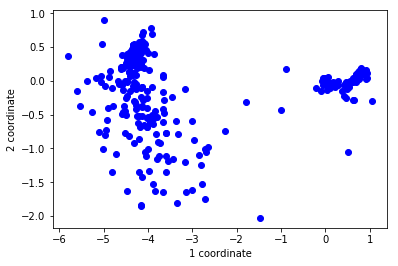

In [15]:
showProjection(ensamble, pca_prody[:2]);

## 2) PCA: pytraj y sklearn

In [9]:
import pytraj as pt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [10]:
# Se carga el archivo pdb del ensamble
traj = pt.load("./cdk2_ensamble_CA.pdb")
traj

pytraj.Trajectory, 390 frames: 
Size: 0.002598 (GB)
<Topology: 298 atoms, 298 residues, 298 mols, non-PBC>
           

In [11]:
# Se instancia un PCA de sklearn
# Se inicializa con los parámetros por default

pca = PCA(copy=True, iterated_power='auto', n_components= 2, random_state= None,
       svd_solver= 'auto', tol= 0.0, whiten= False)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
# Se obtiene la matriz n*m de conformaciones y coordenadas (n= # conf y m = #de átomos * 3)
xyz_2d = traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3)
# La matriz posee 390 conformaciones y 849 coordenadas (849/3 = 298 CA átomos)
xyz_2d.shape

(390, 894)

In [13]:
# Se ajusta el modelo, fit_transform previamente estandariza los valores de la matriz y
# después realiza el ajuste
reduced_cartesian = pca.fit_transform(xyz_2d)

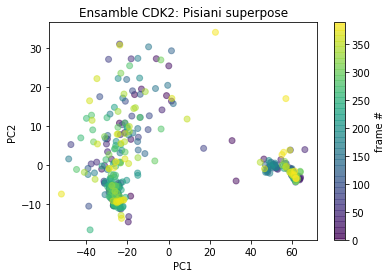

In [43]:
# Observamos la distribución de las conformaciones en función de las primeras dos conformaciones
import warnings
warnings.filterwarnings('ignore')

plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='o', c=range(traj.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Ensamble CDK2: Pisiani superpose")
cbar = plt.colorbar()
cbar.set_label('frame #')

### PCA usando superpose para la "trayectoria"
En el caso de abajo el ensamble es alineado nuevamente usando el método superpose(), que por defecto debería tomar en cuenta toda la estructura de la proteína para minimizar la matriz de RMSD. Recordar que el ensamble guardado originalmente con prody está alineado usando los residuos de Pisiani.

(390, 894)
[0.65441373 0.04351717]


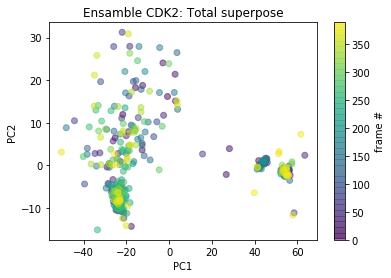

In [14]:
traj_2 = pt.load("./cdk2_ensamble_CA.pdb")

pca_2 = PCA(copy=True, iterated_power='auto', n_components= 2, random_state= None,
   svd_solver= 'auto', tol= 0.0, whiten= False)

traj_2 = traj_2.superpose()
xyz_2d_2 = traj_2.xyz.reshape(traj.n_frames, traj.n_atoms * 3)
print(xyz_2d_2.shape)

reduced_cartesian_2 = pca_2.fit_transform(xyz_2d_2)

print(pca_2.explained_variance_ratio_) # Porcentaje de varianza explicada

plt.figure()
plt.scatter(reduced_cartesian_2[:, 0], reduced_cartesian_2[:,1],
            marker='o', c=range(traj_2.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Ensamble CDK2: Total superpose")
cbar = plt.colorbar()
cbar.set_label('frame #')

In [ ]:
# Queda pendiente garegar una gráfica añadiendo las conformaciones conocidas activa, dfg-out, etc

### Proyectando un conjunto de datos al subespacio ya definido
Ahora comparamos los dos conjuntos de datos (ensamble alineado por Pisiani, y alineado total). Más que nada como una manera de probar cómo protyectar nuevos datos a un subespacio ya definido.

## 3) PCA: Forma manual

[//]: # http://www.fuenterrebollo.com/Economicas/ECONOMETRIA/MULTIVARIANTE/ACP/ACP.pdf, http://www.ub.edu/stat/docencia/Mates/ejemploACP.PDF, 
https://sebastianraschka.com/Articles/2014_pca_step_by_step.html#2-computing-the-d-dimensional-mean-vector


Se considera una serie de $m$ variables (coordenadas: $({x_1, x_2, .., x_m})$ sobre un grupo de $n$ individuos u observaciones (conformaciones) y se trata de calcular, a partir de ellos, un nuevo conjunto de variables (${w_1, w_2, .., w_j, .., w_m}$), incorreladas entre sí (ortogonales), cuyas varianzas van decreciendo progresivamente desde el primer CP al CP $m$.

Por lo tanto, cada $w_j$, con $j\in{1, .., m}$ es una combinación lineal de las (${x_1, x_2, .., x_m}$) originales, es decir:
$$ \mathbf{w_j} = a_{j1}·x_1 +  a_{j2}·x_2 + ... + a_{jm}·x_m, $$
o, de otro modo
$$ \mathbf{w_j} = a^o_j·\mathbf{x}, $$
donde $a^o_j$ esun vector de constantes $a^o_j = (a_{j1}, a_{j2}, .., a_{jm})$ y $\mathbf{x} = ({x_1, x_2, .., x_m})$ transpuesto.

Debido a que lo que se busca es maximizar la varianza de cada CP ($w_j$), una alternativa podría ser aumentar indefinidamente los valores de su vector $a^o_{j}$. Por lo tanto, para mantener la ortogonalidad de la transformación, se impone que el módulo del vector (distancia euclídea) sea igualado a 1.



In [15]:
# Se obtiene la trayectoria
traj_3 = pt.load("./cdk2_ensamble_CA.pdb")

# Se necesitan las coordenadas XYZ de la trayectoria
print("Matriz de coordenadas original:", traj_3.xyz.shape, " y es de tipo: ", type(traj_3.xyz.shape))
# La trayectoria está representada en una matriz de 3 dimensiones
# Para hacer el trabajo se requiere una matriz de dos dimensiones

Matriz de coordenadas original: (390, 298, 3)  y es de tipo:  <class 'tuple'>


Se transforma la matriz a dos dimensiones.

In [16]:
# Se transforma la matriz a dos dimensiones y a una matriz de numpy
# # de columnas = num de frames, filas = num de coordenadas (átomos * 3)
xyz_2d_3 = traj_3.xyz.reshape(traj_3.n_frames, traj_3.n_atoms * 3)

print("Matriz de coordenadas en 2d:", xyz_2d_3.shape, " y es de tipo: ", type(xyz_2d_3))

Matriz de coordenadas en 2d: (390, 894)  y es de tipo:  <class 'numpy.ndarray'>


### 0) Preliminares
#### ¿Se justifica el uso de un PCA?
[//]: <http://www.ub.edu/stat/docencia/Mates/ejemploACP.PDF>
Antes de aplicar el PCA hay que verificar si es necesario o beneficioso hacerlo, es decir, si la correlación (medida normalizada de la covarianza $r_{kj} = cov(k,j)/sd_k*sd_j$) entre las variables es lo suficientemente grande como para justificar la factorización de la matriz de correlaciones.  
Para ello podemos hacer un test de Barlett cuya $H_0$ es que la matriz de covarianzas de las variables no es significativamente distinta a la matriz de identidad, es decir que para cada para de variables $j$ y $k$, donde $j \neq k$, se tiene que $H_0=cov(j,k) = 0$.

In [ ]:
#### PENDIENTE

### 1) Estandarización de los datos
El PCA se ve afectado por la escala de las variables. Aunque en este caso la escala es la misma para todas las coordenadas; todas están en A, procedo a estandarizar cada dato $i$ para cada variable (coordenada) $x_j$:
$$z_{ji} = \frac{(x_{ji} - \mu_{j})} {sd_{j}} $$

#### Valores originales

In [17]:
# Valores originales
xyz_2d_3

array([[-13.743, 190.22 , 105.029, ...,   2.111, 214.475, 105.893],
       [-12.923, 190.677, 105.77 , ...,   0.722, 213.462, 107.978],
       [-13.83 , 190.927, 106.109, ...,   0.609, 213.291, 108.16 ],
       ...,
       [-13.124, 190.884, 102.087, ...,  -1.863, 214.657, 110.513],
       [-10.753, 190.359, 106.61 , ...,   0.698, 213.412, 108.038],
       [-10.593, 190.352, 106.158, ...,   0.849, 213.835, 108.759]])

#### Valores estandarizados

In [59]:
# SOLO como ejercicio didáctico: Estandarización con numpy
# z = (xi - u) / sd
(xyz_2d_3 - np.mean(xyz_2d_3, axis=0) ) / np.std(xyz_2d_3, axis=0) 
# Especificando la operación por columna con axis = 0
# No los guardo en una variable porque usaré el método de sklearn unas celdas más abajo

array([[-0.46896273, -0.24651228, -0.06446425, ...,  0.46251231,
        -0.13488379, -1.79970805],
       [-0.21127009,  0.11003491,  0.17921183, ...,  0.07540607,
        -0.46410176, -0.62120364],
       [-0.49630329,  0.3050826 ,  0.29069117, ...,  0.04391363,
        -0.51967558, -0.51833179],
       ...,
       [-0.27443621,  0.27153439, -1.03193393, ..., -0.64501842,
        -0.07573505,  0.81165424],
       [ 0.47067262, -0.13806576,  0.45544383, ...,  0.06871741,
        -0.48035141, -0.58728984],
       [ 0.52095412, -0.14352709,  0.30680471, ...,  0.11080024,
        -0.34287935, -0.17975906]])

In [18]:
# Mejor aún, guardo los valores en variables para usarlos más tarde
vec_means_var = np.mean(xyz_2d_3, axis=0)
vec_sd_var = np.std(xyz_2d_3, axis=0)
print("Número de variables: ", len(vec_means_var))

Número de variables:  894


#### Estandarización con sklearn.preprocessing.StandarScale

In [64]:
# Estandarización con sk.learn
from sklearn.preprocessing import StandardScaler
xyz_std = StandardScaler().fit_transform( xyz_2d )
# Valores transformados
xyz_std

array([[-0.46896273, -0.24651228, -0.06446425, ...,  0.46251231,
        -0.13488379, -1.79970805],
       [-0.21127009,  0.11003491,  0.17921183, ...,  0.07540607,
        -0.46410176, -0.62120364],
       [-0.49630329,  0.3050826 ,  0.29069117, ...,  0.04391363,
        -0.51967558, -0.51833179],
       ...,
       [-0.27443621,  0.27153439, -1.03193393, ..., -0.64501842,
        -0.07573505,  0.81165424],
       [ 0.47067262, -0.13806576,  0.45544383, ...,  0.06871741,
        -0.48035141, -0.58728984],
       [ 0.52095412, -0.14352709,  0.30680471, ...,  0.11080024,
        -0.34287935, -0.17975906]])

In [67]:
shape(xyz_std)

(390, 894)

### 2) Cálculo de la matriz de covarianza
La covarianza $\sigma_{kj}$ entre dos variables $k$ y $j$ se calcula de la siguiente manera:
$$ \sigma_{kj} = \frac{1}{n-1} \sum_{i=1}^{n}\left(x_{ik} - \bar{x_k}\right)\left(x_{ij}-\bar{x_j}\right)$$
Es la sumatoria del producto de las diferencias de cada observación $i$ de las variables $k$ y $j$ con respecto a su media, dividido entre el número de observaciones $n$ menos uno. 

En la representación matricial es equivalente a la matriz $\Sigma$:
$$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$$

Con lo cual la matriz de covarianzas $\Sigma$ es bidimensional de tamaño $m*m$, con $m$ = número de variables (# átomos * 3). Y el vector $\mathbf{\bar{x}}$, es el vector de medias de todas las $m$ variables.

In [82]:
# Para ir con la nomenclatura.
X_std = xyz_std

# Cálculo del vector de medias
vec_medias = np.mean(X_std)

# Número de observaciones
num_obs = X_std .shape[0]

# Cálculo de la matriz de covarianzas
( 1 / ( num_obs - 1 )  ) * ( ( xyz_std -  vec_medias).T.dot( xyz_std -  vec_medias))

array([[ 1.00257069,  0.05296743,  0.0777827 , ...,  0.05242455,
         0.02861659, -0.16937585],
       [ 0.05296743,  1.00257069,  0.36706642, ..., -0.06903732,
         0.04648098,  0.00320468],
       [ 0.0777827 ,  0.36706642,  1.00257069, ...,  0.11044851,
        -0.11530103, -0.41230714],
       ...,
       [ 0.05242455, -0.06903732,  0.11044851, ...,  1.00257069,
        -0.40227506,  0.11961   ],
       [ 0.02861659,  0.04648098, -0.11530103, ..., -0.40227506,
         1.00257069,  0.33748193],
       [-0.16937585,  0.00320468, -0.41230714, ...,  0.11961   ,
         0.33748193,  1.00257069]])

In [81]:
# Versión simple usando numpy
cov_mtx = np.cov(X_std.T)
cov_mtx

array([[ 1.00257069,  0.05296743,  0.0777827 , ...,  0.05242455,
         0.02861659, -0.16937585],
       [ 0.05296743,  1.00257069,  0.36706642, ..., -0.06903732,
         0.04648098,  0.00320468],
       [ 0.0777827 ,  0.36706642,  1.00257069, ...,  0.11044851,
        -0.11530103, -0.41230714],
       ...,
       [ 0.05242455, -0.06903732,  0.11044851, ...,  1.00257069,
        -0.40227506,  0.11961   ],
       [ 0.02861659,  0.04648098, -0.11530103, ..., -0.40227506,
         1.00257069,  0.33748193],
       [-0.16937585,  0.00320468, -0.41230714, ...,  0.11961   ,
         0.33748193,  1.00257069]])

### 3) Cálculo de los egeinvectores y egeinvalores (vectores y valores propios)
#### Planteamiento
Si A es una matriz de $m*m$, hay $x$ vectores diferentes de cero en $R^n$ tales que $A·x$ sea un múltiplo escalar de $x$.